In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

In [4]:
# Generate synthetic dataset
# TODO: Fill in the parameters for make_classification
# Hint: We want 1000 samples, 2 features, 2 classes, and some noise
X, y = make_classification(
    n_samples=1000,     # Number of samples
    n_features=2,    # Number of features  
    n_classes=2,     # Number of classes
    n_redundant=0,      # No redundant features
    random_state=42
)

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

Dataset shape: (1000, 2)
Labels shape: (1000,)
Unique labels: [0 1]


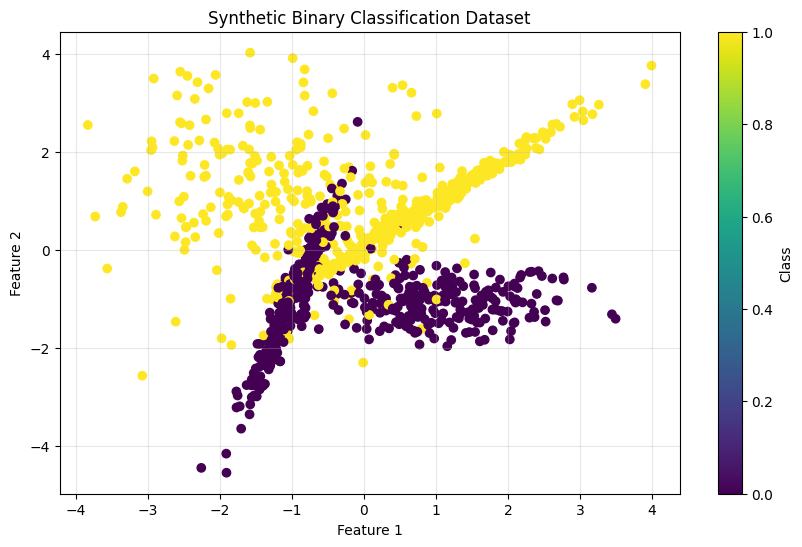

Class distribution: [498 502]
Feature 1 range: [-3.84, 3.99]
Feature 2 range: [-4.54, 4.02]


In [8]:
plt.figure(figsize=(10, 6))

# TODO: Create a scatter plot of the data
# Hint: Use different colors for different classes
# Use plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()

# TODO: Calculate and print basic statistics
print(f"Class distribution: {np.bincount(y)}")  # Hint: Use np.bincount(y)
print(f"Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")  # Hint: Use X[:, 0].min() and max()
print(f"Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")  # Hint: Use X[:, 1].min() and max()

In [9]:
# TODO: Split the data into training and testing sets
# Hint: Use train_test_split with test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Labels  
    test_size=0.2,  # What percentage for testing?
    random_state=42,
    stratify=y    # Should we maintain class balance? Use y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels distribution: {np.bincount}")  # Use np.bincount
print(f"Testing labels distribution: {np.bincount}")   # Use np.bincount

Training set shape: (800, 2)
Testing set shape: (200, 2)
Training labels distribution: <built-in function bincount>
Testing labels distribution: <built-in function bincount>


In [16]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a simple 2-layer neural network
        
        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layer
            output_size: Number of output neurons
        """
        # TODO: Initialize weights and biases
        # Hint: Use np.random.randn() for random initialization
        # Scale by 0.01 to keep values small
        
        # Weights from input to hidden layer
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Shape: (input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))                 # Shape: (1, hidden_size)
        
        # Weights from hidden to output layer  
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Shape: (hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))                 # Shape: (1, output_size)
        
    def sigmoid(self, x):
        """
        TODO: Implement sigmoid activation function
        Formula: 1 / (1 + exp(-x))
        
        Hint: Use np.exp() and be careful of numerical overflow
        You might want to clip x to prevent overflow
        """
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """
        TODO: Implement derivative of sigmoid
        Formula: sigmoid(x) * (1 - sigmoid(x))
        """
        sig = self.sigmoid(x)
        return sig * (1 - sig)
    
    def forward(self, X):
        """
        TODO: Implement forward propagation
        
        Steps:
        1. Calculate z1 = X @ W1 + b1
        2. Calculate a1 = sigmoid(z1)
        3. Calculate z2 = a1 @ W2 + b2  
        4. Calculate a2 = sigmoid(z2)
        
        Store intermediate values for backpropagation
        """
        # Input to hidden layer
        self.z1 = X @ self.W1 + self.b1  # Linear combination
        self.a1 = self.sigmoid(self.z1)  # Activation
        
        # Hidden to output layer
        self.z2 = self.a1 @ self.W2 + self.b2   # Linear combination
        self.a2 = self.sigmoid(self.z2)  # Final output
        
        return self.a2
    
    def compute_loss(self, y_true, y_pred):
        """
        TODO: Implement binary cross-entropy loss
        Formula: -[y*log(y_pred) + (1-y)*log(1-y_pred)]
        
        Hint: Add small epsilon to prevent log(0)
        """
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        loss = -(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))  # Implement the formula above
        return np.mean(loss)

# Test the network initialization
network = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)
print(f"W1 shape: {network.W1.shape}")
print(f"W2 shape: {network.W2.shape}")
print("Network initialized successfully!")

W1 shape: (2, 4)
W2 shape: (4, 1)
Network initialized successfully!


In [17]:
# Test forward propagation with a few samples
test_input = X_train[:5]  # Take first 5 samples
test_labels = y_train[:5].reshape(-1, 1)  # Reshape for consistency

# TODO: Run forward propagation
predictions = network.forward(test_input)

print(f"Input shape: {test_input.shape}")
print(f"Predictions shape: {predictions.shape}")
print(f"Predictions: {predictions.flatten()}")
print(f"True labels: {test_labels.flatten()}")

# TODO: Calculate loss
loss = network.compute_loss(test_labels, predictions)
print(f"Initial loss: {loss:.4f}")

Input shape: (5, 2)
Predictions shape: (5, 1)
Predictions: [0.49799833 0.49800664 0.49796708 0.49798455 0.49799966]
True labels: [1 0 1 1 1]
Initial loss: 0.6956


In [19]:
# Add backpropagation to our network
def backward(self, X, y_true, y_pred):
    """
    Implement backpropagation for a simple 2-layer neural network.
    """
    m = X.shape[0]  # Number of samples

    # STEP 1: Output layer gradients
    dz2 = y_pred - y_true  # Derivative of loss w.r.t. z2
    dW2 = (self.a1.T @ dz2) / m  # Gradient for W2
    db2 = np.sum(dz2, axis=0, keepdims=True) / m  # Gradient for b2

    # STEP 2: Hidden layer gradients  
    da1 = dz2 @ self.W2.T  # Backpropagate error to hidden layer
    dz1 = da1 * self.sigmoid_derivative(self.z1)  # Apply derivative of activation function
    dW1 = (X.T @ dz1) / m  # Gradient for W1
    db1 = np.sum(dz1, axis=0, keepdims=True) / m  # Gradient for b1
    
    return dW1, db1, dW2, db2

def update_weights(self, dW1, db1, dW2, db2, learning_rate=0.01):
    """
    Update weights and biases using gradients.
    
    Args:
        dW1: Gradient for W1
        db1: Gradient for b1
        dW2: Gradient for W2
        db2: Gradient for b2
        learning_rate: Step size for weight update
    """
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1
    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2

# Add methods to the SimpleNeuralNetwork class
SimpleNeuralNetwork.backward = backward
SimpleNeuralNetwork.update_weights = update_weights

In [20]:
# Prepare data for training
X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)  # Normalize features
X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)    # Use training stats
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Training parameters
epochs = 1000      # TODO: How many epochs? Try 1000
learning_rate = 0.1  # TODO: What learning rate? Try 0.1

# Initialize network
network = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Storage for plotting
train_losses = []
test_losses = []

# TODO: Implement training loop
for epoch in range(epochs):
    # Forward propagation
    train_pred = network.forward(X_train_norm)
    
    # Calculate loss
    train_loss = network.compute_loss(y_train_reshaped, train_pred)
    
    # Backpropagation
    dW1, db1, dW2, db2 = network.backward(X_train_norm, y_train_reshaped, train_pred)
    
    # Update weights
    network.update_weights(dW1, db1, dW2, db2, learning_rate)
    
    # Evaluate on test set (for monitoring)
    test_pred = network.forward(X_test_norm)
    test_loss = network.compute_loss(y_test_reshaped, test_pred)
    
    # Store losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

print("Training completed!")

Epoch 0: Train Loss = 0.6931, Test Loss = 0.6931
Epoch 100: Train Loss = 0.6930, Test Loss = 0.6931
Epoch 200: Train Loss = 0.6925, Test Loss = 0.6926
Epoch 300: Train Loss = 0.6896, Test Loss = 0.6898
Epoch 400: Train Loss = 0.6742, Test Loss = 0.6749
Epoch 500: Train Loss = 0.6142, Test Loss = 0.6171
Epoch 600: Train Loss = 0.5043, Test Loss = 0.5113
Epoch 700: Train Loss = 0.4159, Test Loss = 0.4266
Epoch 800: Train Loss = 0.3694, Test Loss = 0.3826
Epoch 900: Train Loss = 0.3471, Test Loss = 0.3620
Training completed!


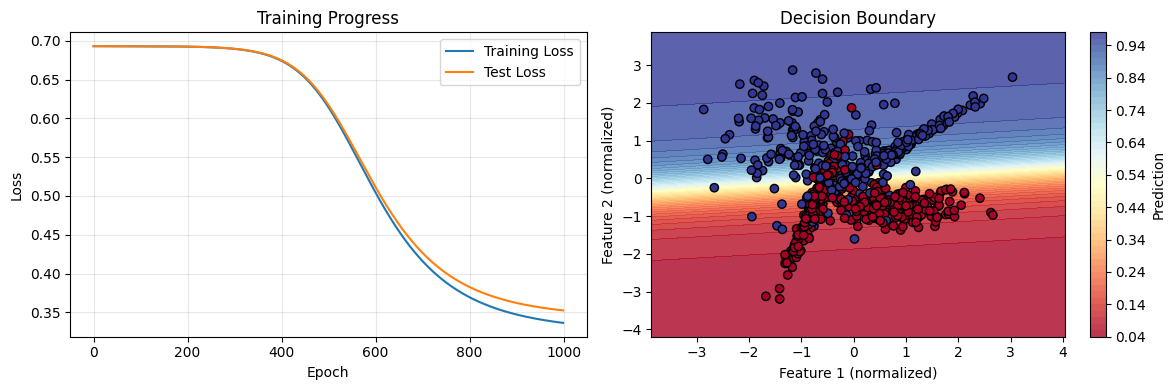

In [21]:
# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curves
plt.subplot(1, 2, 1)
# TODO: Plot training and test losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)

# Decision boundary visualization
plt.subplot(1, 2, 2)

# Create a mesh to plot decision boundary
h = 0.02
x_min, x_max = X_train_norm[:, 0].min() - 1, X_train_norm[:, 0].max() + 1
y_min, y_max = X_train_norm[:, 1].min() - 1, X_train_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# TODO: Make predictions on the mesh
mesh_points = np.column_stack([xx.ravel(), yy.ravel()])
Z = network.forward(mesh_points).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.colorbar(label='Prediction')

# Plot training data
scatter = plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.title('Decision Boundary')

plt.tight_layout()
plt.show()

In [22]:
# Calculate accuracy
def calculate_accuracy(y_true, y_pred):
    """
    Calculate classification accuracy
    """
    binary_pred = (y_pred > 0.5).astype(int)
    accuracy = (binary_pred == y_true).mean()
    return accuracy

# Get final predictions
train_pred_final = network.forward(X_train_norm)
test_pred_final = network.forward(X_test_norm)

# TODO: Calculate accuracies
train_accuracy = calculate_accuracy(y_train_reshaped, train_pred_final)
test_accuracy = calculate_accuracy(y_test_reshaped, test_pred_final)

print(f"\nFinal Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")


Final Results:
Training Accuracy: 0.8662
Test Accuracy: 0.8750
Final Training Loss: 0.3364
Final Test Loss: 0.3525
